# 一、 有一组温度数据，按照时间和温度绘制折线图。 
bj_temps = [29,27,23,22]

bj_hours = ["20时","23时","2时","5时"]

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

E:\app\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)


E:\app\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0, flags=flags)


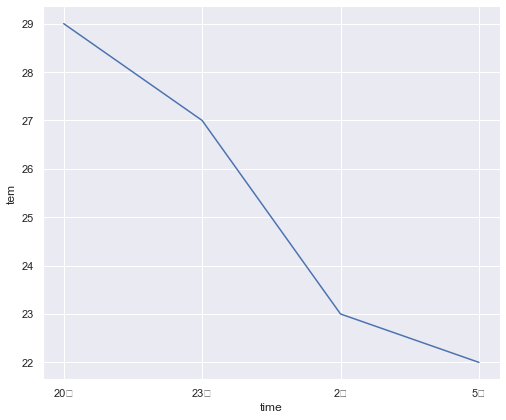

In [50]:
#法1
sns.set(rc={"font.sans-serif":"SimHei"})
tem = [29,27,23,22]
time = ["20时","23时","2时","5时"]
data = pd.DataFrame({"time":time,"tem":tem})

sns.set_style("darkgrid")
g = sns.FacetGrid(data,height=6,aspect=1.2)
g.map(sns.lineplot,"time","tem")

[Text(0, 0, '20时'), Text(1, 0, '23时'), Text(2, 0, '2时'), Text(3, 0, '5时')]

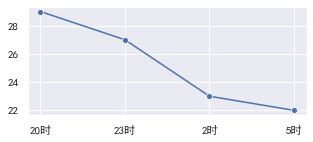

In [49]:
#法2
sns.set(rc={"font.sans-serif":"SimHei"})
tem = [29,27,23,22]
time = ["20时","23时","2时","5时"]
plt.figure(figsize=(5,2))
ax = sns.lineplot(x=range(4),y=tem,marker="o")
ax.set_xticks(range(4))
ax.set_xticklabels(time)

# 二、有以下国家数据，根据时间绘制条形图。

In [4]:
data = pd.read_csv("homework.csv",encoding="GB18030")
data

,指标,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年
0,法人单位数(个),22009092,18191382,15729199,13701440,10825611.0,10616530,9593729,8754588,8003868
1,农、林、牧、渔业法人单位数(个),1926771,1481473,1204724,951045,161824.0,440853,321086,242429,184764
2,采矿业法人单位数(个),108900,104074,103426,101673,89112.0,107596,105490,104065,103403
3,制造业法人单位数(个),3483617,3019269,2801143,2616671,2252225.0,2380759,2240315,2098370,1959254
4,电力、燃气及水的生产和供应业法人单位数(个),120736,99469,87486,79679,70409.0,69947,66652,64151,62038
5,建筑业法人单位数(个),1045232,754512,574128,464975,347519.0,391392,346026,302232,261694
6,交通运输、仓储和邮政业法人单位数(个),540994,443325,378705,323044,262048.0,249832,219630,195829,175914
7,信息传输、计算机服务和软件业法人单位数(个),719150,507674,387842,289162,226107.0,245669,208867,191182,176326
8,批发和零售业法人单位数(个),6252424,5041698,4199026,3513338,2810531.0,2630690,2276295,1965118,1670315
9,住宿和餐饮业法人单位数(个),378974,317619,274283,235337,199592.0,186837,172070,164762,154895


In [5]:
# 清理数据
new = pd.DataFrame()
row = {"企业":np.nan,"年份":np.nan,"数量":np.nan}
new = new.append(row,ignore_index=True)
for index in data.index[1:]:
    enter = data.iloc[index,0]
    for column in data.columns[:0:-1]:
        num = data.loc[index,column]
        line_data = pd.DataFrame([{"企业":enter,"年份":column,"数量":num}])
        new = pd.concat([new,line_data])
new = new.dropna()
new.head(5)

,企业,年份,数量
0,农、林、牧、渔业法人单位数(个),2009年,184764.0
0,农、林、牧、渔业法人单位数(个),2010年,242429.0
0,农、林、牧、渔业法人单位数(个),2011年,321086.0
0,农、林、牧、渔业法人单位数(个),2012年,440853.0
0,农、林、牧、渔业法人单位数(个),2013年,161824.0


E:\app\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '2009-2017不同类型企业数量')

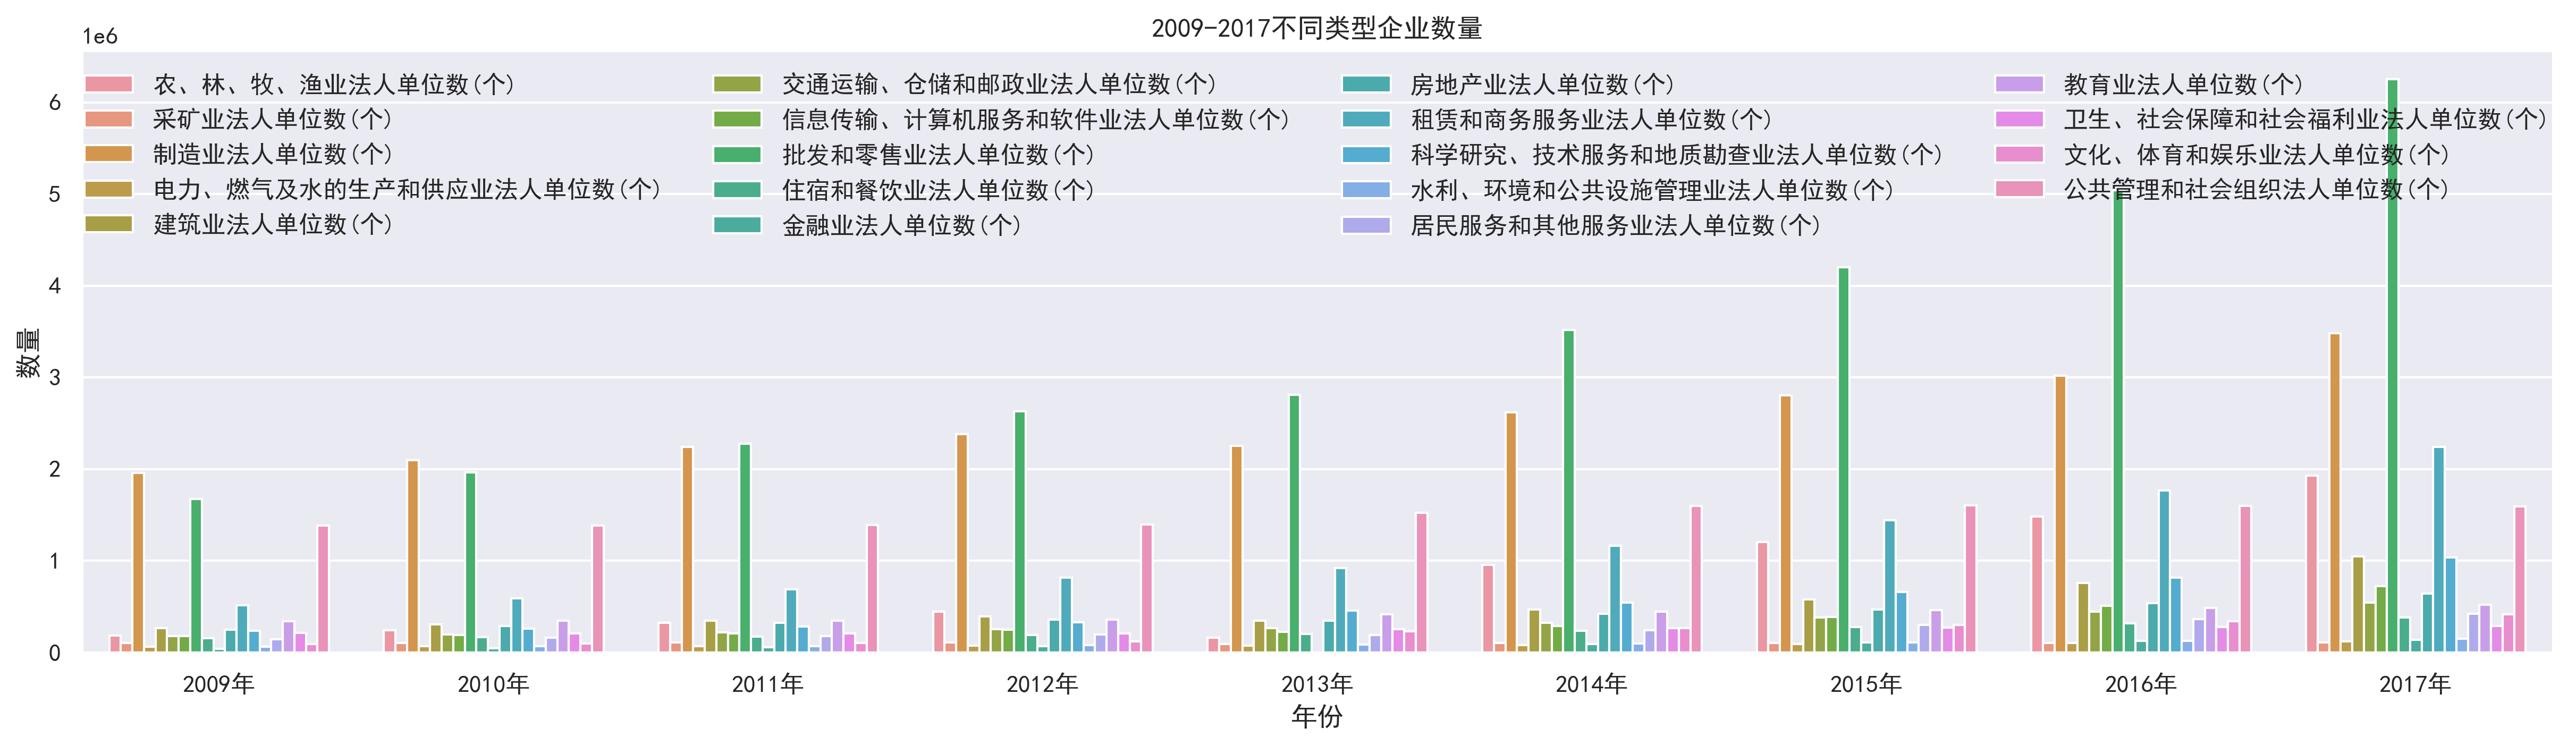

In [208]:
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.figure(figsize=(20,5),dpi=300)
sns.barplot("年份","数量",data=new,hue="企业")
plt.legend(ncol=4,loc="upper center",frameon=False)
plt.title("2009-2017不同类型企业数量")

# 三、有链家网的数据，请按照以下要求实现绘图：
1.x轴是Region（行政区），y轴是每个区的平均每平米的单价，绘制条形图。x轴是Region，y轴是每平米的单价，绘制swarm图。以上两个图需要绘制在一个figure上。
2.使用FacetGrid绘制尺寸与单价的关系，并且区分有无电梯。

In [97]:
data = pd.read_csv("lianjia.csv")
data.dropna(thresh=1,inplace=True)
data = data.sample(500)
data["Elevator"].replace("有电梯","have elevator",inplace=True)
data["Elevator"].replace("无电梯","no elevator",inplace=True)
data.head(5)

,Num,Direction,Elevator,Floor,Garden,Layout,Region,Price,Renovation,Size,Year,UnitPrice
1224,1224,南,no elevator,中楼层(共5层),馨乐园,2室2厅,浦东,430.0,精装,83.05,1995.0,5.177604
1633,1633,南,have elevator,低楼层(共8层),菊泉新城(陆翔路698弄),2室1厅,宝山,259.0,其他,83.11,1995.0,3.116352
262,262,南,NaN,低楼层(共23层),大名城名郡,3室2厅,嘉定,285.0,精装,88.00,1995.0,3.238636
475,475,南北,no elevator,低楼层(共6层),新世纪花苑(三期)(浦东),2室2厅,浦东,620.0,其他,102.00,1995.0,6.078431
206,206,南,have elevator,中楼层(共18层),永兆豪庭,3室2厅,徐汇,850.0,毛坯,128.36,1995.0,6.622001


In [102]:
data_mean = data.groupby('Region')["UnitPrice"].mean().sort_values(ascending=False).to_frame().reset_index()
data_mean = data_mean.rename(columns={"UnitPrice":"mean_UnitPrice"})

C:\software\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\software\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Region', ylabel='UnitPrice'>

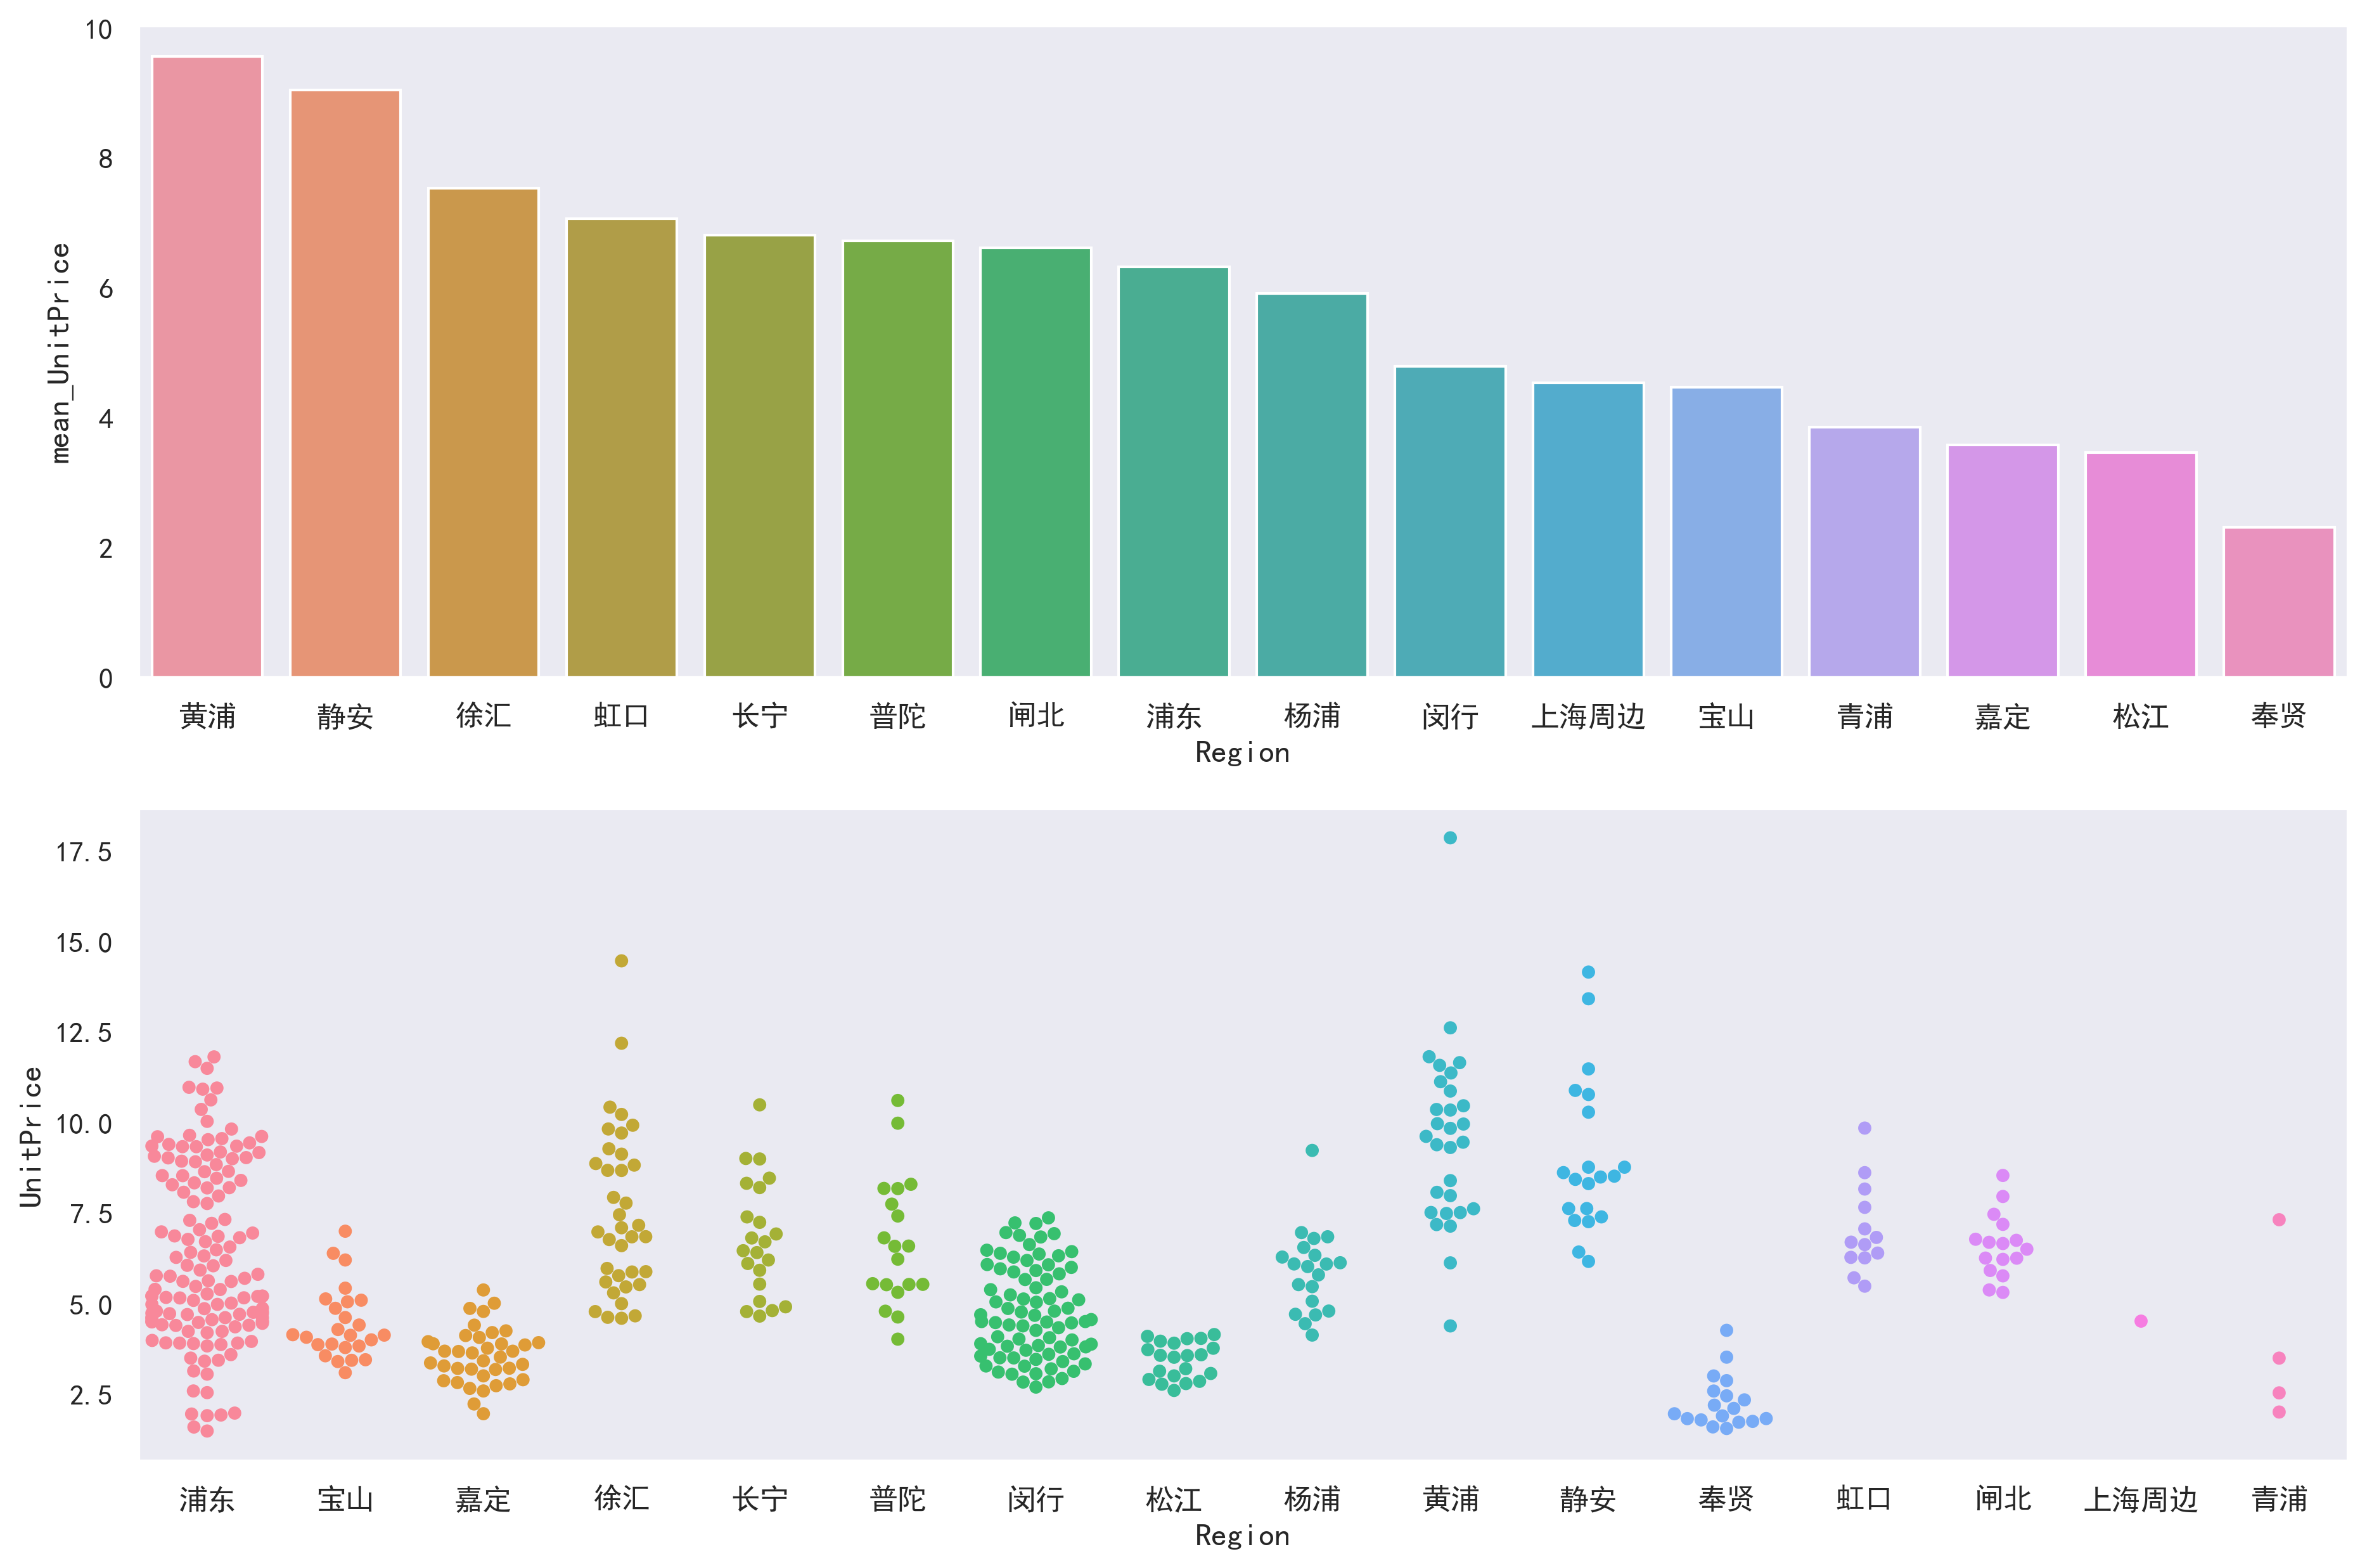

In [105]:
plt.rcParams["font.sans-serif"]=["SimHei"]
fig,axes = plt.subplots(2,1,figsize=(15,10),dpi=300)
sns.barplot(x="Region",y="mean_UnitPrice",data=data_mean,ax=axes[0])
sns.swarmplot(x="Region",y="UnitPrice",data=data,ax=axes[1])


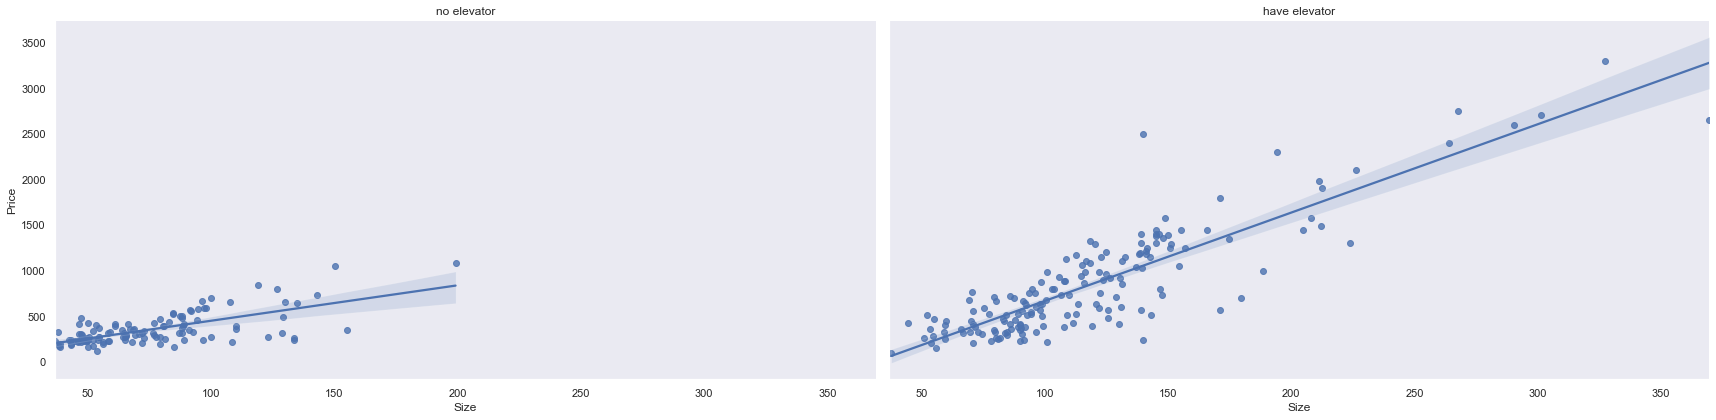

In [96]:
sns.set_style("dark")
g = sns.FacetGrid(data,col="Elevator",height=6,aspect=2)
g.map(sns.regplot,"Size","Price")
g.set_titles(template="{col_name}")


20